In [44]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [45]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib
import matplotlib.pyplot as plt

### load the iris data

In [47]:
df = pd.read_csv('/home/mike/iris', header=None, names=['var1', 'var2', 'var3', 'var4', 'target'])

In [48]:
y = [0]*50 +  [1]*50 + [2]*50
df['y'] = y

In [49]:
t = df[df.index%4>0]
v = df[df.index%4==0]

In [50]:
xt = t.iloc[:, 0:4]   ## training
yt = t.iloc[:, -1]
xv = v.iloc[:, 0:4]                              ## validation
yv = v.iloc[:, -1]

### model

In [51]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 12), 
    torch.nn.ReLU(),
 #   torch.nn.Linear(12, 6), 
 #   torch.nn.ReLU(),
    torch.nn.Linear(12, 3),
    torch.nn.Softmax(1),
)

In [52]:
model.cuda()

Sequential(
  (0): Linear(in_features=4, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=3, bias=True)
  (3): Softmax()
)

### prepare variables, or tensors

In [53]:
lr = .1

In [54]:
Xt = Variable(torch.from_numpy(xt.astype(np.double).as_matrix()).float()).cuda()
Xv = Variable(torch.from_numpy(xv.astype(np.double).as_matrix()).float()).cuda()

In [55]:
Yt = Variable(torch.from_numpy(np.array(yt)).long(), requires_grad=False).cuda()
Yv = Variable(torch.from_numpy(np.array(yv)).long(), requires_grad=False).cuda()

### hyperparameters

In [56]:
epoch = 100
lt = [0]*epoch      ## trace the training loss
lv = [0]*epoch      ## trace the validation loss

### loss and optimization functions

In [57]:
loss = torch.nn.CrossEntropyLoss()
#loss = nn.MSELoss()
optim = torch.optim.LBFGS(model.parameters(), lr=lr)
# optim = torch.optim.Adam(model.parameters(), lr=lr)
# optim = torch.optim.SGD(model.parameters(), lr=lr)

### train the model

In [58]:
for e in range(epoch):

    def closure():
        y_hat = model(Xt)
        optim.zero_grad()
        l = loss(y_hat, Yt)
        lt[e] = l.item()
        l.backward()
        return l
    optim.step(closure)
    ## validate
    #model.eval()
    with torch.no_grad():
        pred = model(Xv)
        lv[e] = loss(pred, Yv).item()
    

### training, validation loss

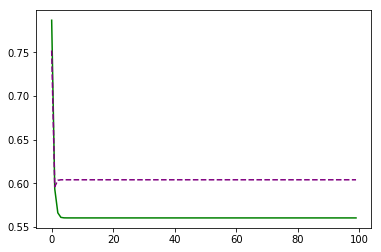

In [59]:
plt.plot(lt, color="green")
plt.plot(lv, color="purple", linestyle="dashed")

### validation accuracy

In [60]:
out = model(Xv)

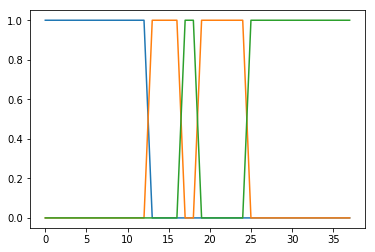

In [61]:
plt.plot(out.cpu().data.numpy())


In [62]:
_, pred = torch.max(out, 1)

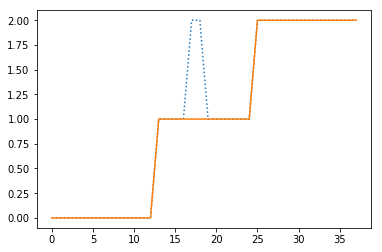

In [63]:
plt.plot(pred.cpu().data.numpy(), linestyle="dotted")
plt.plot(Yv.cpu().data.numpy())

In [64]:
pred.cpu().data.numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
torch.__version__

'0.5.0a0+d2f98fc'